<div style = 'border : 3px solid non; background-color:#ECFFDC ;;padding:10px'>

<a class="anchor" id="about_dataset"></a>

<p style="font-family:Georgia;padding:20px;line-height:25px";><font style="font-family:Georgia; font-size:210%;"> Exploratory Data Analysis of Autism in Toddlers</font><br>
<br>
    <b>Objective:</b>
<br>
The primary objective of this Exploratory Data Analysis (EDA) is to investigate the prevalence, characteristics, and potential predictors of Autism Spectrum Disorder (ASD) in toddlers. This analysis aims to uncover patterns, trends, and insights within the provided dataset, which can inform early detection and intervention strategies, ultimately improving outcomes for children diagnosed with ASD.
<br><br>
    <b>Background:</b>
<br>
Autism Spectrum Disorder is a developmental disorder that affects communication, behavior, and social interactions. Early diagnosis and intervention are crucial for improving the developmental trajectory and quality of life for children with ASD. Understanding the factors that contribute to ASD diagnosis in toddlers can help in developing better screening tools and targeted interventions.
<br><br>
        <b>Key Questions:</b>
<br><br>
    <b>Demographic Analysis:</b>
<br>
1. Gender Distribution: What is the proportion of male and female toddlers diagnosed with ASD? How does this compare to the overall population in the dataset?<br>
2. Age Distribution: At what ages are toddlers most commonly diagnosed with ASD? Are there specific age groups that show a higher prevalence of diagnosis?
<br><br>
    <b>Feature Analysis:</b>
<br>
1. Categorical Features: What are the distributions of categorical variables such as family history, certain behaviors, and other demographic factors? How do these features differ between diagnosed and non-diagnosed groups?<br>
2. Numerical Features: What are the distributions of numerical variables such as diagnostic scores (e.g., A1_Score, A2_Score, etc.)? Are there noticeable patterns or anomalies in these distributions?
<br><br>
    <b>Missing Values:</b>
<br>
1. Handling Missing Data: What is the extent of missing data in the dataset? What imputation methods are appropriate for dealing with missing values to ensure the integrity of the analysis?
<br><br>
    <b>Diagnosis Trends:</b>
<br>
1. Temporal Trends: Are there any noticeable trends in the timing and frequency of ASD diagnoses? For instance, is there a peak age at which diagnoses are most commonly made?<br>
2. Score Distributions: How do the distributions of diagnostic scores (e.g., A1_Score, A2_Score) differ between toddlers diagnosed with ASD and those not diagnosed? What insights can be drawn from these differences?
<br><br>
    <b>Data Description</b>
<br>
The dataset consists of 30,000 entries and 28 columns, each representing different attributes of the children being analyzed. These attributes can be categorized into numerical and categorical features.
<br><br>
    <b>Key Features</b>
<br><br>
    <b>Demographic Information:</b><br>
1. age: The age of the child.<br>
2. gender: The gender of the child.<br>
3. ethnicity: The ethnic background of the child.<br>
4. contry_of_res: The country of residence.<br>
5. Behavioral Scores: A1_Score to A10_Score: Scores from various behavioral assessments, each taking binary values (0 or 1).
<br><br>
    <b>Medical and Family History:</b><br>
1. jaundice: Indicates if the child had jaundice at birth.<br>
2. austim: Indicates if there is a family history of autism.<br>
3. used_app_before: Indicates if the child has used an autism screening app before.<br>
4. Communication_Skills, Repetitive_Behaviors, Sensory_Sensitivity, Coexisting_Conditions, Birth_Complications, Early_Development_Delays, Family_History_ASD: Various attributes indicating the child’s medical and developmental history.
<br><br>
    <b>Target Variable</b>
<br>
1. Class/ASD: The target variable indicating the diagnosis of Autism Spectrum Disorder (YES for diagnosed, NO for not diagnosed).

<hr>

### 1. Importing the Packages & Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer

<hr>

### 2. Importing the data and Performing Descriptive Analysis

In [2]:
df_autism = pd.read_csv('Autism_In_Toddlers_Cleaned.csv', sep=',')

In [3]:
df_autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,age_desc,relation,Class/ASD,Communication_Skills,Repetitive_Behaviors,Sensory_Sensitivity,Coexisting_Conditions,Birth_Complications,Early_Development_Delays,Family_History_ASD
0,1,1,0,0,1,1,0,1,0,0,...,4-11 years,Parent,NO,Good,Moderate,High,ADHD,No,No,Yes
1,1,1,0,0,1,1,0,1,0,0,...,4-11 years,Parent,NO,Fair,Moderate,Very High,NaN,No,Yes,No
2,1,1,0,0,0,1,1,1,0,0,...,4-11 years,?,NO,Developing,Moderate,Low,ADHD,No,Yes,No
3,0,1,0,0,1,1,0,0,0,1,...,4-11 years,?,NO,Good,Moderate,Moderate,Anxiety,No,Yes,No
4,1,1,1,1,1,1,1,1,1,1,...,4-11 years,Parent,YES,Fair,Moderate,Moderate,NaN,No,Yes,No


In [4]:
df_autism.shape

(30000, 28)

In [5]:
df_autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   A1_Score                  30000 non-null  int64  
 1   A2_Score                  30000 non-null  int64  
 2   A3_Score                  30000 non-null  int64  
 3   A4_Score                  30000 non-null  int64  
 4   A5_Score                  30000 non-null  int64  
 5   A6_Score                  30000 non-null  int64  
 6   A7_Score                  30000 non-null  int64  
 7   A8_Score                  30000 non-null  int64  
 8   A9_Score                  30000 non-null  int64  
 9   A10_Score                 30000 non-null  int64  
 10  age                       29588 non-null  float64
 11  gender                    30000 non-null  object 
 12  ethnicity                 30000 non-null  object 
 13  jundice                   30000 non-null  object 
 14  austim

Numerical Columns: Combining the integer and float columns, the dataset includes a total of 12 numerical columns. These columns are essential for quantitative analysis, allowing for calculations, statistical analysis, and data modeling.

Categorical Columns: With 16 categorical columns, a significant portion of the dataset is dedicated to qualitative data. These columns are crucial for segmenting the data into meaningful groups, enabling categorical analysis and the application of machine learning algorithms that handle categorical variables.

In [6]:
df_autism.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,30000.0,0.633733,0.481792,0.0,0.0,1.0,1.0,1.0
A2_Score,30000.0,0.534567,0.498812,0.0,0.0,1.0,1.0,1.0
A3_Score,30000.0,0.743367,0.436783,0.0,0.0,1.0,1.0,1.0
A4_Score,30000.0,0.551033,0.497397,0.0,0.0,1.0,1.0,1.0
A5_Score,30000.0,0.743233,0.436857,0.0,0.0,1.0,1.0,1.0
A6_Score,30000.0,0.712200,0.452745,0.0,0.0,1.0,1.0,1.0
A7_Score,30000.0,0.606167,0.488607,0.0,0.0,1.0,1.0,1.0
A8_Score,30000.0,0.496500,0.499996,0.0,0.0,0.0,1.0,1.0
A9_Score,30000.0,0.493100,0.499961,0.0,0.0,0.0,1.0,1.0
A10_Score,30000.0,0.726033,0.446000,0.0,0.0,1.0,1.0,1.0


In [7]:
df_autism.describe(include='object').T

,count,unique,top,freq
gender,30000,2,m,21373
ethnicity,30000,11,White-European,11100
jundice,30000,2,no,21778
austim,30000,2,no,24976
contry_of_res,30000,52,United Kingdom,5038
used_app_before,30000,2,no,28865
age_desc,30000,1,4-11 years,30000
relation,30000,6,Parent,21972
Class/ASD,30000,2,NO,15511
Communication_Skills,30000,5,Limited,6053


In [8]:
df_autism.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD', 'Communication_Skills',
       'Repetitive_Behaviors', 'Sensory_Sensitivity', 'Coexisting_Conditions',
       'Birth_Complications', 'Early_Development_Delays',
       'Family_History_ASD'],
      dtype='object')

<hr>

### 3. Data Cleaning

In [9]:
df_autism['ethnicity'].value_counts()

White-European     11100
Asian               4725
?                   4427
Middle Eastern      2771
South Asian         2157
Black               1436
Others              1433
Latino               821
Hispanic             718
Pasifika             206
Turkish              206
Name: ethnicity, dtype: int64

In [10]:
df_autism['relation'].value_counts()

Parent                      21972
?                            4427
Relative                     1745
Health care professional     1337
Self                          414
self                          105
Name: relation, dtype: int64

In [11]:
df_autism = df_autism.replace({'?':'Others', 'others':'Others', 'self':'Self', 'm':'male', 'f':'female'})

In [12]:
df_autism['relation'].value_counts()

Parent                      21972
Others                       4427
Relative                     1745
Health care professional     1337
Self                          519
Name: relation, dtype: int64

In [13]:
df_autism['ethnicity'].value_counts()

White-European     11100
Others              5860
Asian               4725
Middle Eastern      2771
South Asian         2157
Black               1436
Latino               821
Hispanic             718
Pasifika             206
Turkish              206
Name: ethnicity, dtype: int64

In [14]:
df_autism.isnull().sum()

A1_Score                        0
A2_Score                        0
A3_Score                        0
A4_Score                        0
A5_Score                        0
A6_Score                        0
A7_Score                        0
A8_Score                        0
A9_Score                        0
A10_Score                       0
age                           412
gender                          0
ethnicity                       0
jundice                         0
austim                          0
contry_of_res                   0
used_app_before                 0
result                          0
age_desc                        0
relation                        0
Class/ASD                       0
Communication_Skills            0
Repetitive_Behaviors            0
Sensory_Sensitivity             0
Coexisting_Conditions       11289
Birth_Complications             0
Early_Development_Delays        0
Family_History_ASD              0
dtype: int64

In [15]:
# using KNN method to impute null values

impute = KNNImputer(n_neighbors=5)
df_autism['age'] = impute.fit_transform(df_autism[['age']])

In [16]:
df_autism['age']=df_autism['age'].astype('int64')

In [17]:
df_autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   A1_Score                  30000 non-null  int64 
 1   A2_Score                  30000 non-null  int64 
 2   A3_Score                  30000 non-null  int64 
 3   A4_Score                  30000 non-null  int64 
 4   A5_Score                  30000 non-null  int64 
 5   A6_Score                  30000 non-null  int64 
 6   A7_Score                  30000 non-null  int64 
 7   A8_Score                  30000 non-null  int64 
 8   A9_Score                  30000 non-null  int64 
 9   A10_Score                 30000 non-null  int64 
 10  age                       30000 non-null  int64 
 11  gender                    30000 non-null  object
 12  ethnicity                 30000 non-null  object
 13  jundice                   30000 non-null  object
 14  austim                

In [18]:
df_autism['age'].value_counts()

4     9456
5     4623
6     4423
7     2769
11    2675
8     2158
9     2052
10    1844
Name: age, dtype: int64

In [19]:
df_autism['Coexisting_Conditions'].fillna(df_autism['Coexisting_Conditions'].mode()[0], inplace=True)

In [20]:
df_autism.isnull().sum()

A1_Score                    0
A2_Score                    0
A3_Score                    0
A4_Score                    0
A5_Score                    0
A6_Score                    0
A7_Score                    0
A8_Score                    0
A9_Score                    0
A10_Score                   0
age                         0
gender                      0
ethnicity                   0
jundice                     0
austim                      0
contry_of_res               0
used_app_before             0
result                      0
age_desc                    0
relation                    0
Class/ASD                   0
Communication_Skills        0
Repetitive_Behaviors        0
Sensory_Sensitivity         0
Coexisting_Conditions       0
Birth_Complications         0
Early_Development_Delays    0
Family_History_ASD          0
dtype: int64

In [21]:
df_autism.duplicated().sum()

875

In [22]:
# dropping the duplicate values

df_autism.drop_duplicates(inplace=True)

In [23]:
df_autism.duplicated().value_counts()

False    29125
dtype: int64

In [24]:
# renaming the column names- jundice', 'austim', 'contry_of_res'

df_autism.rename(columns={'jundice':'jaundice', 'austim':'autism', 'contry_of_res':'country_of_res'}, inplace=True)

In [25]:
df_autism.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD', 'Communication_Skills',
       'Repetitive_Behaviors', 'Sensory_Sensitivity', 'Coexisting_Conditions',
       'Birth_Complications', 'Early_Development_Delays',
       'Family_History_ASD'],
      dtype='object')

In [26]:
#mapping the ethnicity with the country of residence

ethnicity_mapping = {
    'United States': 'White European',
    'Brazil': 'South American',
    'Spain': 'White European',
    'Egypt': 'Middle Eastern',
    'New Zealand': 'Pasifika',
    'Bahamas': 'Black',
    'Burundi': 'African',
    'Austria': 'White European',
    'Argentina': 'South American',
    'Jordan': 'Middle Eastern',
    'Ireland': 'White European',
    'United Arab Emirates': 'Middle Eastern',
    'Afghanistan': 'South Asian',
    'Lebanon': 'Middle Eastern',
    'United Kingdom': 'White European',
    'South Africa': 'Black',
    'Italy': 'White European',
    'Pakistan': 'South Asian',
    'Bangladesh': 'South Asian',
    'Chile': 'South American',
    'France': 'White European',
    'China': 'Asian',
    'Australia': 'White European',
    'Canada': 'White European',
    'Saudi Arabia': 'Middle Eastern',
    'Netherlands': 'White European',
    'Romania': 'White European',
    'Sweden': 'White European',
    'Tonga': 'Pasifika',
    'Oman': 'Middle Eastern',
    'India': 'South Asian',
    'Philippines': 'Asian',
    'Sri Lanka': 'South Asian',
    'Sierra Leone': 'African',
    'Ethiopia': 'African',
    'Viet Nam': 'Asian',
    'Iran': 'Middle Eastern',
    'Costa Rica': 'Latino',
    'Germany': 'White European',
    'Mexico': 'Latino',
    'Russia': 'White European',
    'Armenia': 'White European',
    'Iceland': 'White European',
    'Nicaragua': 'Latino',
    'Hong Kong': 'Asian',
    'Japan': 'Asian',
    'Ukraine': 'White European',
    'Kazakhstan': 'Asian',
    'American Samoa': 'Pasifika',
    'Uruguay': 'South American',
    'Serbia': 'White European',
    'Portugal': 'White European',
    'Malaysia': 'Asian',
    'Ecuador': 'Latino',
    'Niger': 'African',
    'Belgium': 'White European',
    'Bolivia': 'South American',
    'Aruba': 'Latino',
    'Finland': 'White European',
    'Turkey': 'White European',
    'Nepal': 'South Asian',
    'Indonesia': 'Asian',
    'Angola': 'African',
    'Azerbaijan': 'Middle Eastern',
    'Iraq': 'Middle Eastern',
    'Czech Republic': 'White European',
    'Cyprus': 'Middle Eastern'
}

In [27]:
co = []
for i in range(len(df_autism['ethnicity'])):
    country = df_autism['country_of_res'].iloc[i]
    if df_autism['ethnicity'].iloc[i] == '?':
        if country in ethnicity_mapping:
            co.append(ethnicity_mapping[country])
    else:
        
        co.append(df_autism['ethnicity'].iloc[i])


In [28]:
co_1=[]
for i in co:
    if i=='' or i=='White-European':
        co_1.append('White European')
    else:
        co_1.append(i)

In [29]:
df_autism['ethnicity']=co_1

In [30]:
df_autism.to_csv('Autism_In_Toddlers_PBI1.csv', sep=',')

<hr>

### 4. Exploratory Data Analysis

#### 4.1. Univariate Analysis

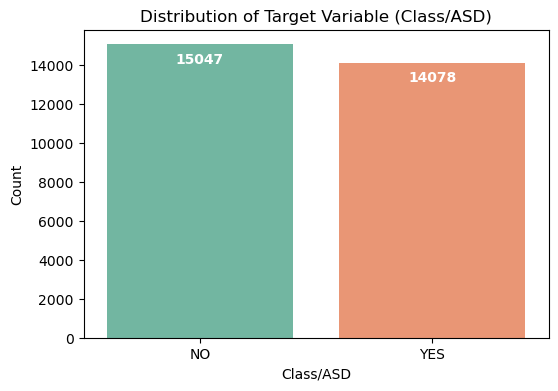

In [31]:
# visualizing the distribution of the target variable- Class/ASD

plt.figure(figsize=(6, 4))
ax= sns.countplot(x='Class/ASD', data=df_autism, palette='Set2')
plt.title('Distribution of Target Variable (Class/ASD)')
plt.xlabel('Class/ASD')
plt.ylabel('Count')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='white', weight='bold', size=10)
    
plt.show()

We can observe from the bar graph of the target variable, Class/ASD, that out of a total of 29,125 cases, there are 14,078 cases classified as autistic. This accounts for approximately 48.34% of the total cases.

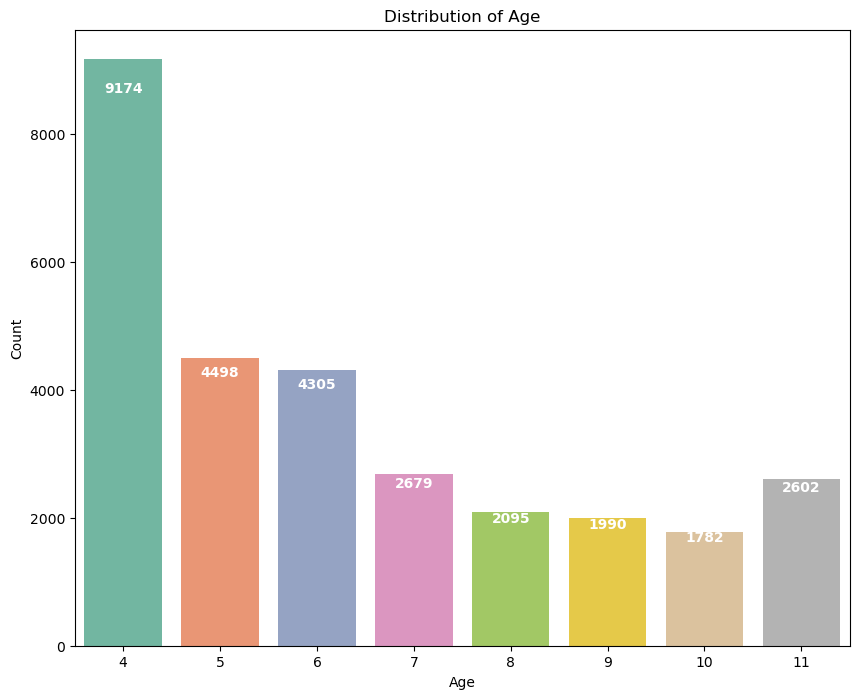

In [32]:
# visualizing the Age varible distrution

plt.figure(figsize=(10, 8))
ax= sns.countplot(x='age', data=df_autism, palette='Set2')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='white', weight='bold', size=10)
    
plt.show()

Distribution Analysis: By analyzing the distribution of ages at which diagnostic tests were conducted, it is evident that there is a peak at the age of 4 years. This means that more tests were administered to 4-year-old children than to children of any other age.
<br><br>
Implication: The high frequency of tests at this specific age might suggest that age 4 is a critical period for diagnosis. It could be due to developmental milestones becoming more pronounced, leading to increased screening and evaluation by healthcare providers.
<br><br>
Data Insight: This insight can guide healthcare professionals and policymakers in understanding when diagnostic interventions are most commonly performed, potentially influencing resource allocation and awareness campaigns targeting early detection and diagnosis.

Text(0.5, 1.0, 'Distribution of Gender')

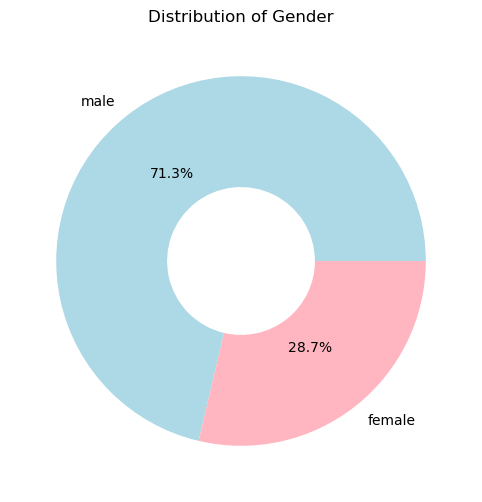

In [33]:
# visualizing the Age varible distrution

colors = ['lightblue', 'lightpink'] 
label = df_autism.gender.value_counts().index
size = df_autism.gender. value_counts()
exploded=(0,0)

plt.figure(figsize=(8, 6))
plt.pie(size, labels=label,colors=colors, autopct='%1.1f%%', explode=exploded, wedgeprops=dict(width=0.6))
plt.title('Distribution of Gender')

The analysis of the age distribution for ASD (Autism Spectrum Disorder) diagnosis reveals a significant gender disparity. Specifically, a larger proportion of diagnosed toddlers are male (71.3%) compared to female (28.7%).

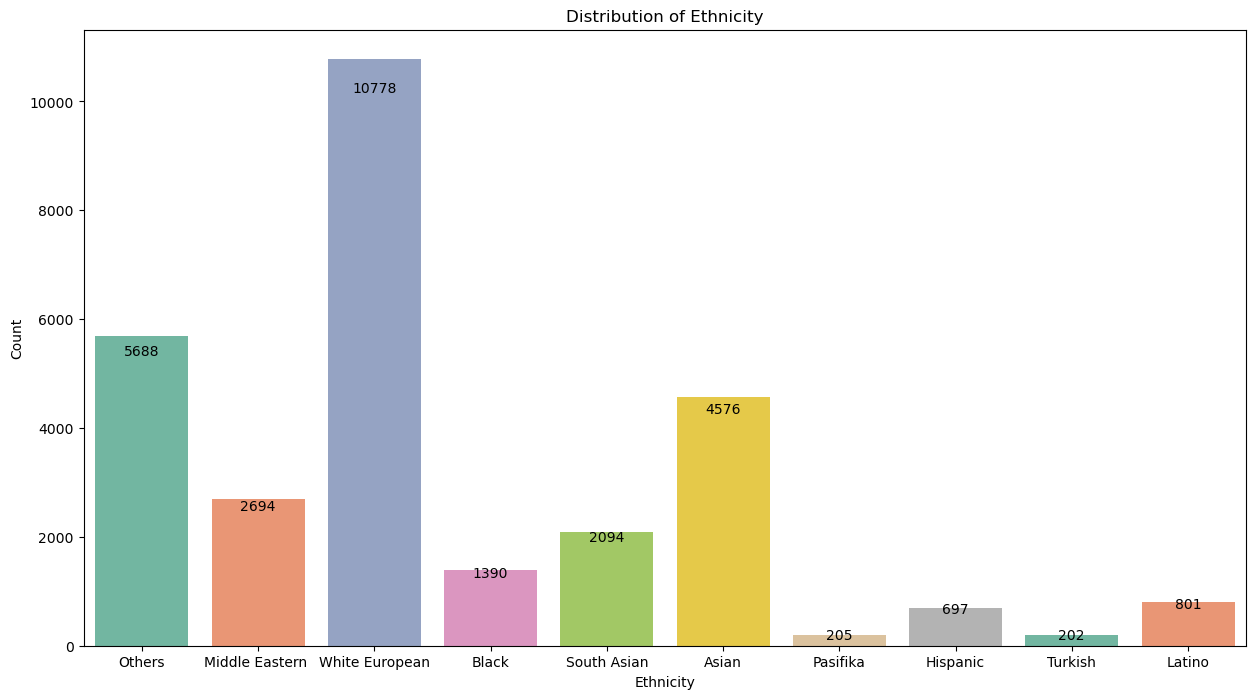

In [34]:
# visualizing the Ethnicity varible distrution

plt.figure(figsize=(15, 8))
ax= sns.countplot(x='ethnicity', data=df_autism, palette='Set2')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='black', size=10)
    
plt.show()

#### 4.2. Bivariate Analysis

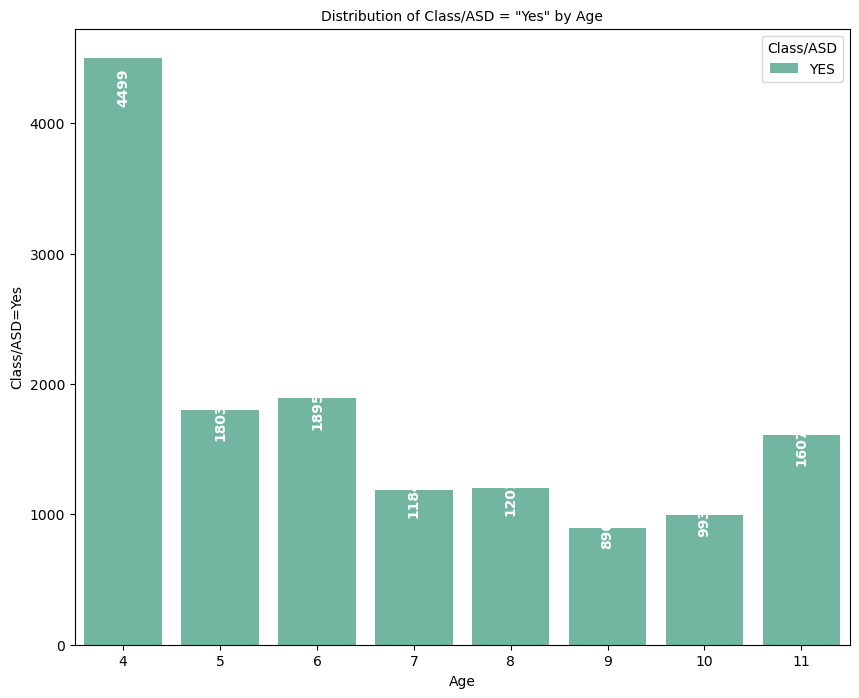

In [35]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Age

# Filter the dataset for Class/ASD == 'YES'
df_autism_yes = df_autism[df_autism['Class/ASD'] == 'YES']

plt.figure(figsize=(10, 8))
ax= sns.countplot(x='age', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Age', size=10)
plt.xlabel('Age', size= 10)
plt.ylabel('Class/ASD=Yes', size=10)

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='white', weight='bold', size=10, rotation=90)
    
plt.show()

The significantly higher count of children aged 4 compared to other ages suggests that age 4 might be a critical age for autism diagnosis. This could imply that parents or healthcare providers are more likely to seek diagnostic evaluation for children around this age, or that developmental signs of autism become more noticeable or concerning at this stage.

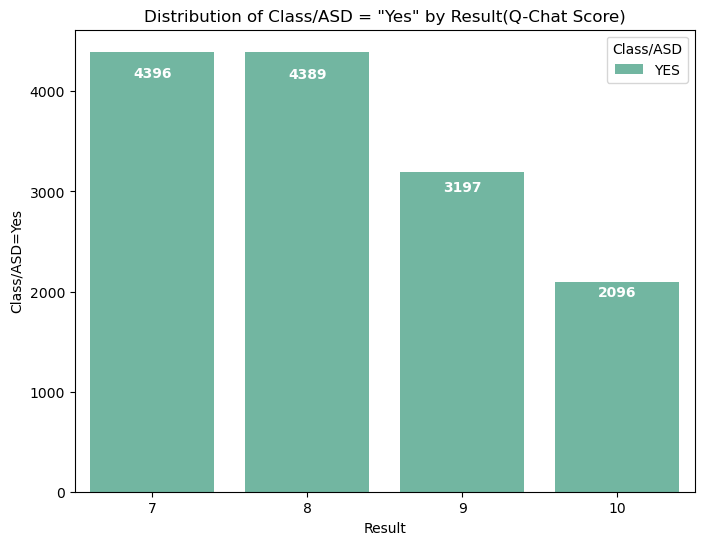

In [36]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Result

plt.figure(figsize=(8, 6))
ax= sns.countplot(x='result', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Result(Q-Chat Score)')
plt.xlabel('Result')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='white', weight='bold', size=10)
    
plt.show()

When the Q-Chat scores exceed 7, there is a noticeable increase in the detection of autism cases, with a significant spike exactly at the score of 7. This suggests that a Q-Chat score of 7 or higher is a strong indicator of autism in children. Therefore, focusing diagnostic efforts on children with scores at or above this threshold could improve early detection and intervention strategies.

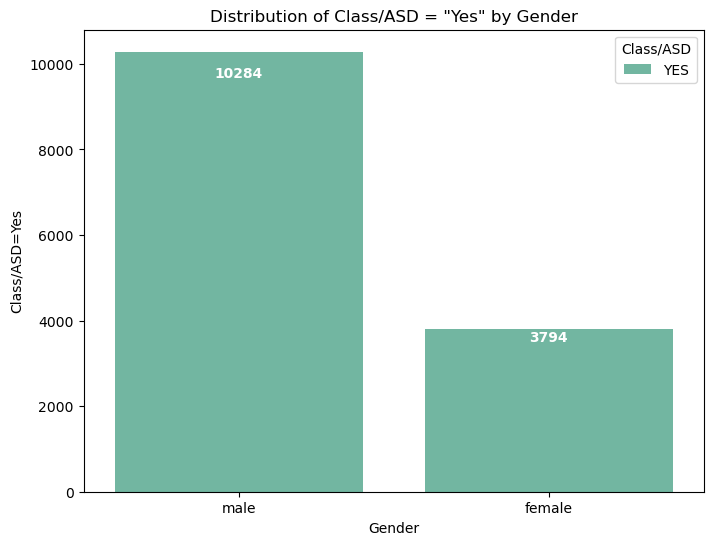

In [37]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Gender

plt.figure(figsize=(8, 6))
ax= sns.countplot(x='gender', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Gender')
plt.xlabel('Gender')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='white', weight='bold', size=10)
    
plt.show()

The pie chart shows a significant gender disparity in the prevalence of autism among children. Specifically, the number of male children diagnosed with autism (73.05%) is substantially higher than the number of female children diagnosed with autism (27.95%). This suggests that autism is more commonly diagnosed in male children compared to female children.

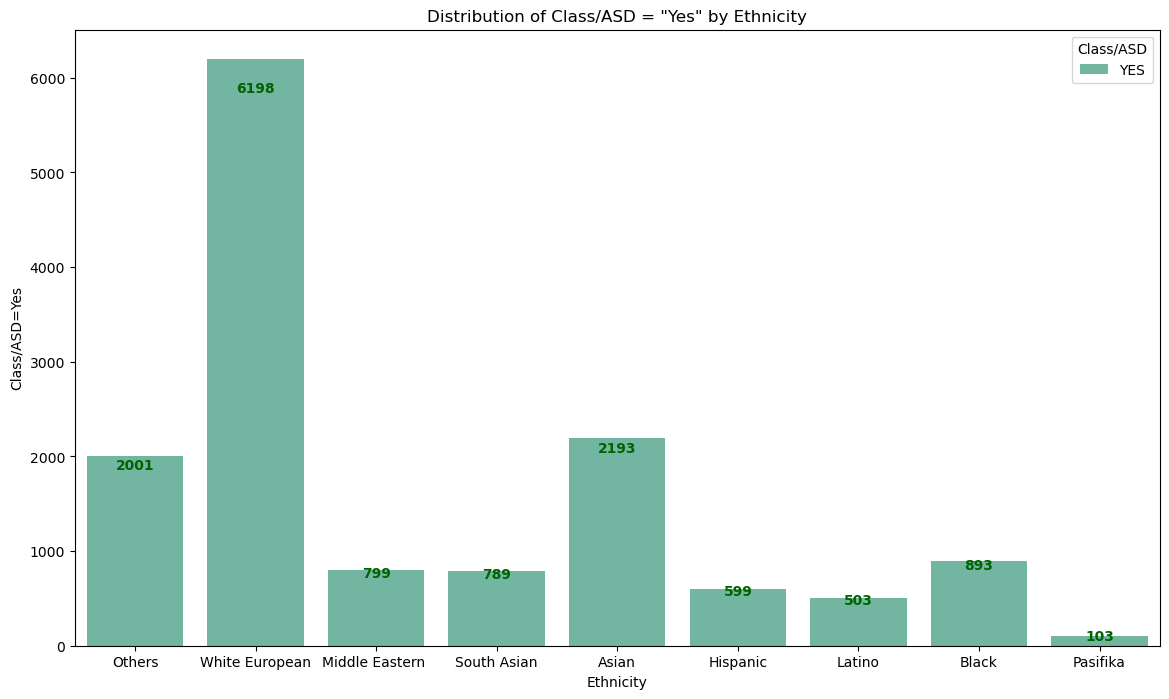

In [38]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Ethnicity

plt.figure(figsize=(14, 8))
ax= sns.countplot(x='ethnicity', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='darkgreen', weight='bold', size=10)
    
plt.show()

1. Majority Ethnicity: White European children make up the largest ethnic group among the children with autism in the dataset, comprising about 44.02% of the total.

2. Minority Ethnicity: Asian children with autism represent a smaller proportion, about 15.57% of the total.

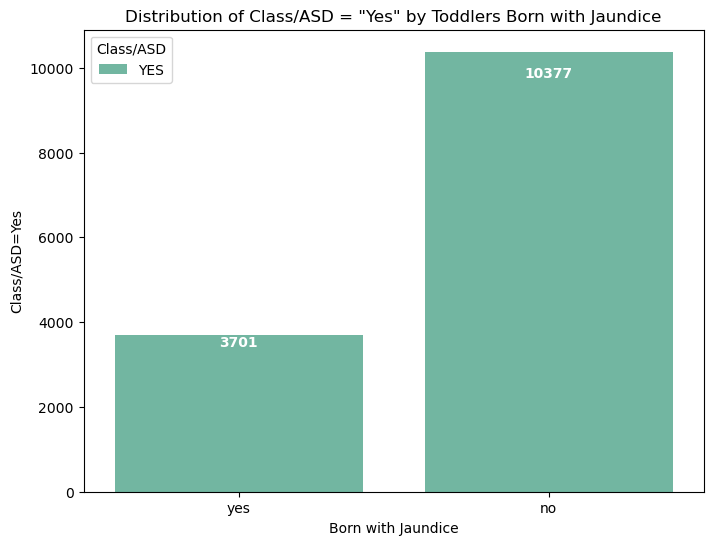

In [39]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Jaundice

plt.figure(figsize=(8, 6))
ax= sns.countplot(x='jaundice', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Toddlers Born with Jaundice')
plt.xlabel('Born with Jaundice')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='white', weight='bold', size=10)
    
plt.show()

The graph shows that out of a total of 14,078 autistic children in the dataset, 3,701 children have jaundice. This indicates that approximately 26.28% of the children with autism in the dataset also have jaundice. This could suggest a potential correlation between jaundice and autism in children, which may warrant further investigation.

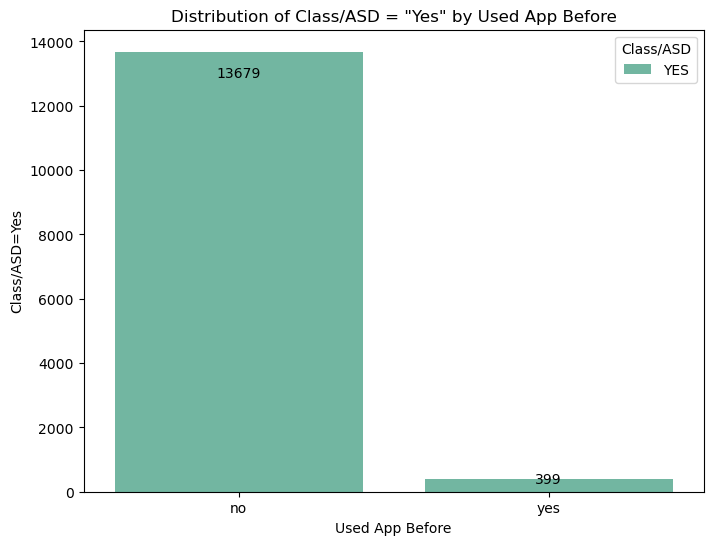

In [40]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Used App Before

plt.figure(figsize=(8, 6))
ax= sns.countplot(x='used_app_before', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Used App Before')
plt.xlabel('Used App Before')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='black', size=10)
    
plt.show()

Children who had not used an app before scored slightly higher (97.16%) on the Q-CHAT than those who had used an app before (2.84%). This suggests that, on average, children who had used an app earlier show marginally lower Q-CHAT scores, which might indicate a slightly lower likelihood of autism as compared to those who had not used an app.

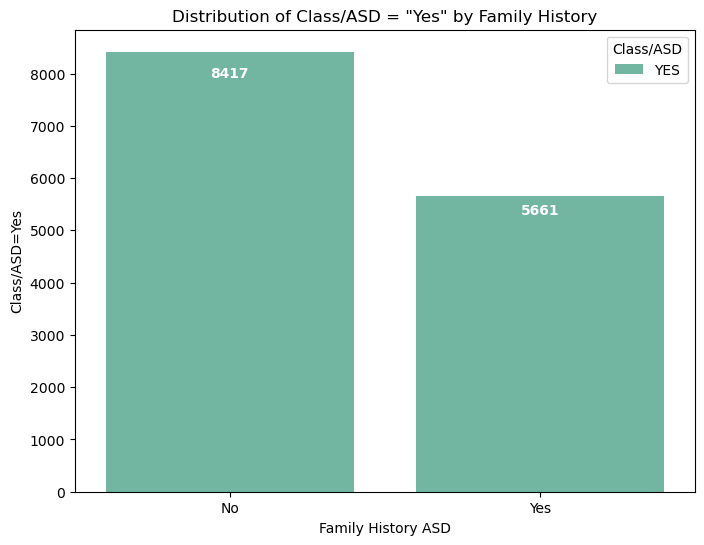

In [41]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Family History

plt.figure(figsize=(8, 6))
ax= sns.countplot(x='Family_History_ASD', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Family History')
plt.xlabel('Family History ASD')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='white', weight='bold', size=10)
    
plt.show()

1. Approximately 40.21% of the children with ASD in the dataset have a family history of ASD.
2. Approximately 59.79% of the children with ASD in the dataset do not have a family history of ASD.

A significant proportion of children with ASD do not have a family history, which might suggest other contributing factors beyond family genetics. The data indicates that while family history is a factor, it does not account for the majority of ASD cases in this dataset.

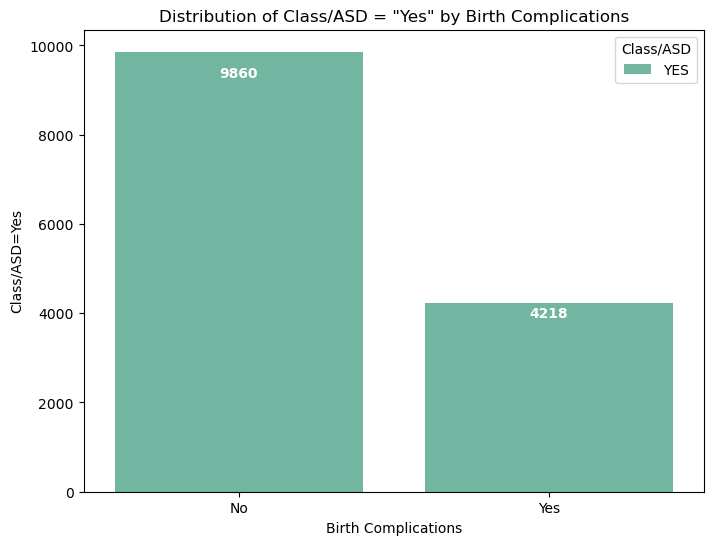

In [42]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Birth Complications

plt.figure(figsize=(8, 6))
ax= sns.countplot(x='Birth_Complications', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Birth Complications')
plt.xlabel('Birth Complications')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='white', weight='bold', size=10)
    
plt.show()

Approximately 29.96% of the autistic children have birth complications, indicating a notable correlation between birth complications and autism.

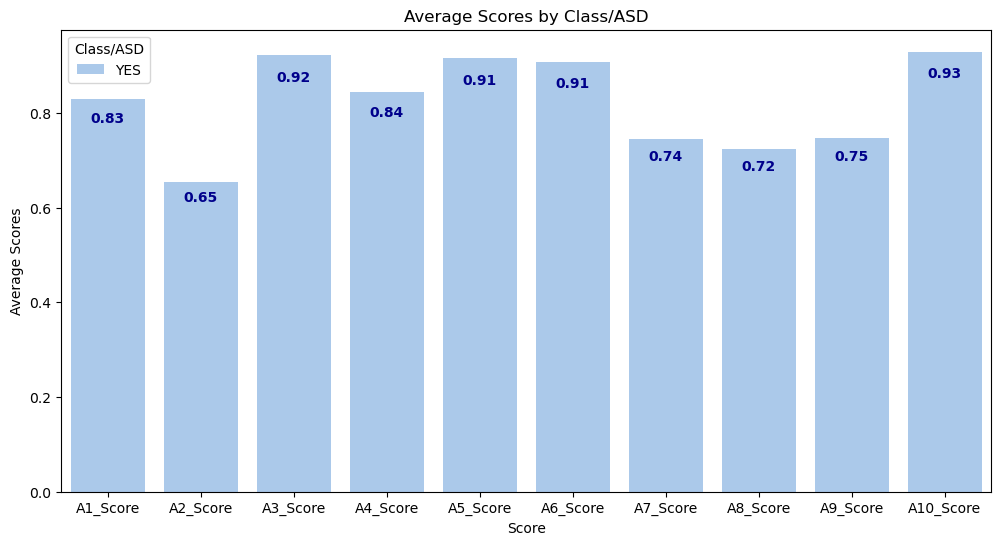

In [43]:
# Average scores by the target variable = Class/ASD

plt.figure(figsize=(12,6))
score_columns = [f'A{i}_Score' for i in range(1, 11)]
df_yes_scores = df_autism_yes.groupby('Class/ASD')[score_columns].mean().reset_index().melt(id_vars='Class/ASD', var_name='Score', value_name='Average')
ax=sns.barplot(x='Score', y='Average', hue='Class/ASD', data=df_yes_scores, palette='pastel')
plt.title('Average Scores by Class/ASD')
plt.xlabel('Score')
plt.ylabel('Average Scores')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='darkblue', weight='bold', size=10)
    
plt.show()

The distribution of average scores for A1 to A10 in the graph shows high levels of autism traits in children. This suggests that these specific questions are particularly effective at identifying traits associated with autism. Therefore, these questions should be emphasized in screening tools to improve the accuracy and early detection of autism in children.

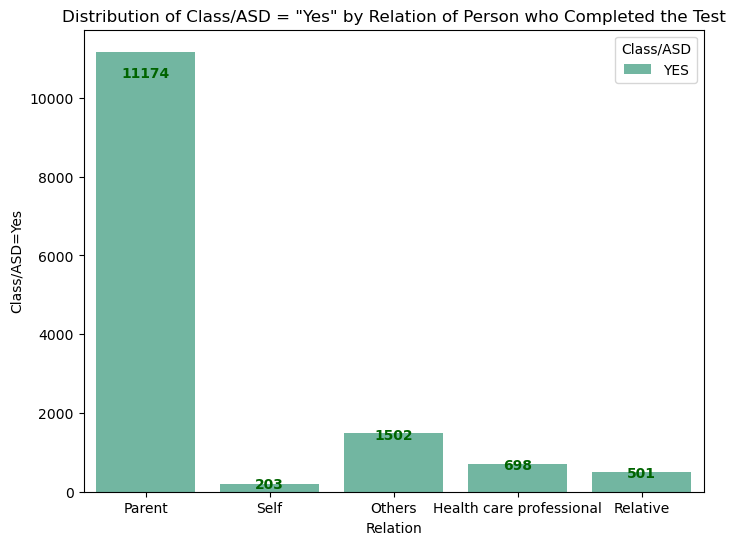

In [44]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Relation

plt.figure(figsize=(8, 6))
ax= sns.countplot(x='relation', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Relation of Person who Completed the Test')
plt.xlabel('Relation')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='darkgreen', weight='bold', size=10)
    
plt.show()

The largest group is parents (11,174 respondents), indicating that this population has a significant interest or stake in autism-related issues. This suggests that insights gathered from this group may be more representative of familial experiences.

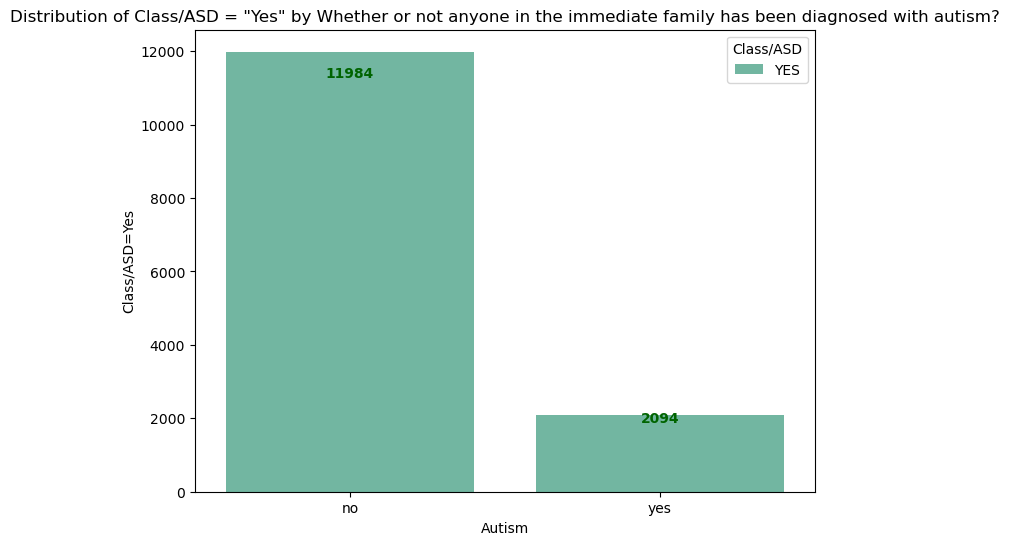

In [45]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Autism

plt.figure(figsize=(8, 6))
ax= sns.countplot(x='autism', hue= 'Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Whether or not anyone in the immediate family has been diagnosed with autism?')
plt.xlabel('Autism')
plt.ylabel('Class/ASD=Yes')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='darkgreen', weight='bold', size=10)
    
plt.show()

Only 14.87% of autistic children have autism cases in their immediate family. This suggests that family history is not a significant factor, and the absence of autism cases in a family does not necessarily prevent future autism diagnoses.

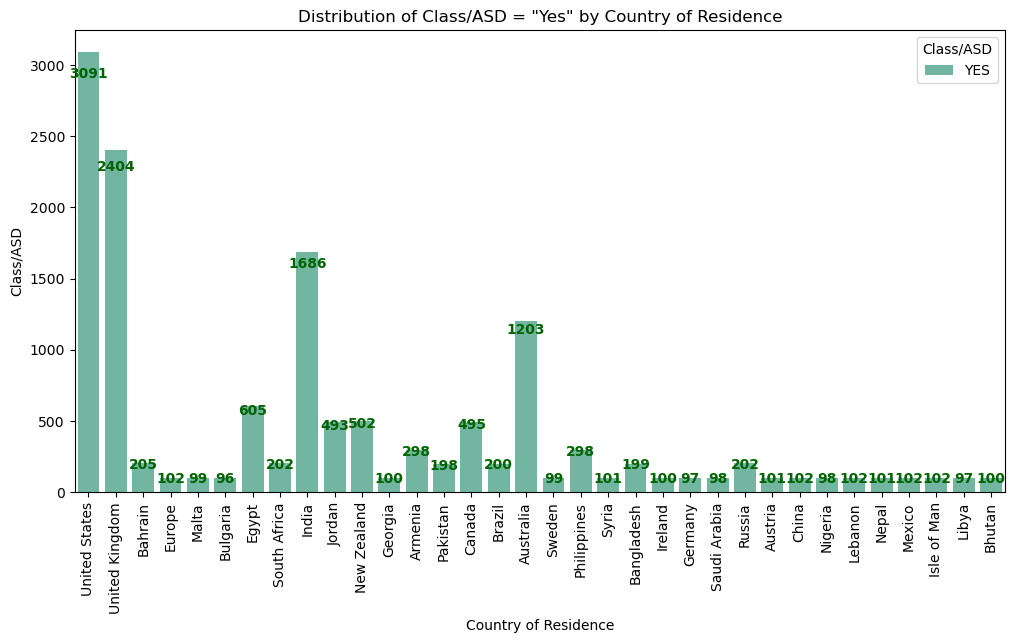

In [81]:
# visualizing the distribution of the target variable where there is Class/ASD = Yes by Autism

plt.figure(figsize=(12, 6))
ax= sns.countplot(x='country_of_res',hue='Class/ASD', data=df_autism_yes, palette='Set2')
plt.title('Distribution of Class/ASD = "Yes" by Country of Residence')
plt.xlabel('Country of Residence')
plt.xticks(rotation=90)
plt.ylabel('Class/ASD')

# annotation for the bar graph

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.05),
                ha='center', va='center', color='darkgreen', weight='bold', size=10)
    
plt.show()

1. USA: Approximately 10.61% of the autism cases in the dataset are from the USA. This is the highest among the three countries mentioned, indicating that a significant portion of the autism cases in the dataset come from the USA.
2. UK: The UK accounts for approximately 8.25% of the autism cases in the dataset. This is the second-highest percentage, suggesting that the UK also has a notable number of autism cases in this dataset.
3. India: India has approximately 5.78% of the autism cases in the dataset. This is the lowest among the three countries mentioned but still represents a significant number of cases.

The USA has the highest percentage of autism cases among the three countries, followed by the UK and then India. This could be due to various factors such as population size, diagnostic criteria, healthcare accessibility, and awareness levels.